<a href="https://www.kaggle.com/code/muhammadayyubramli/jdc-2023-dabes-team?scriptVersionId=125364135" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jdc-2023-dataset/train.csv


In [2]:
train = pd.read_csv('/kaggle/input/jdc-2023-dataset/train.csv')
train.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (1,3,5,6,7,8,9,10,11,12,13,16,17,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,...,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material,damage_grade
0,0,floor two,1.0,256 ft^2,22.0,Flat,Bamboo or Timber,Bamboo/Timber Light roof,Clay,TImber/Bamboo-Mud,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,0.0,0.0,1.0
1,1,Floor 3,3.0,985 ft^2,18.0,Flat,Clay Sand Mixed mortar-Stone/Brick,Wood Light Roof or Bamboo Heavy Roof,Clay,TImber/Bamboo-Mud,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
2,2,Two Floor,7.0,NaN,14.0,Flat,Mud mortar-Stone/Brick,NaN,Clay,Wood-Mud or Bamboo Mud,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
3,3,two,18.0,185 ft^2,15.0,Flat,Clay Sand Mixed mortar-Stone/Brick,Wood Light Roof or Bamboo Light Roof,Clay,TImber/Bamboo-Mud,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,4.0
4,4,just 2 floor,22.0,290 ft^2,17.0,Flat,Clay Sand Mixed mortar-Stone/Brick,Bamboo or Timber Light roof,Clay,Timber Mud or Bamboo-Mud,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,1.0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722815 entries, 0 to 722814
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      722815 non-null  int64  
 1   floors_before_eq (total)        390009 non-null  object 
 2   old_building                    483611 non-null  float64
 3   plinth_area (ft^2)              301607 non-null  object 
 4   height_before_eq (ft)           390009 non-null  float64
 5   land_surface_condition          421209 non-null  object 
 6   type_of_foundation              483611 non-null  object 
 7   type_of_roof                    301607 non-null  object 
 8   type_of_ground_floor            390009 non-null  object 
 9   type_of_other_floor             421209 non-null  object 
 10  position                        410809 non-null  object 
 11  building_plan_configuration     421209 non-null  object 
 12  technical_soluti

In [4]:
train.dtypes

Unnamed: 0                          int64
floors_before_eq (total)           object
old_building                      float64
plinth_area (ft^2)                 object
height_before_eq (ft)             float64
land_surface_condition             object
type_of_foundation                 object
type_of_roof                       object
type_of_ground_floor               object
type_of_other_floor                object
position                           object
building_plan_configuration        object
technical_solution_proposed        object
legal_ownership_status             object
has_secondary_use                 float64
type_of_reinforcement_concrete    float64
residential_type                   object
no_family_residing                 object
public_place_type                  object
industrial_use_type                object
govermental_use_type               object
flexible_superstructure            object
wall_binding                      float64
wall_material                     

In [5]:
train.isna().sum()

Unnamed: 0                             0
floors_before_eq (total)          332806
old_building                      239204
plinth_area (ft^2)                421208
height_before_eq (ft)             332806
land_surface_condition            301606
type_of_foundation                239204
type_of_roof                      421208
type_of_ground_floor              332806
type_of_other_floor               301606
position                          312006
building_plan_configuration       301606
technical_solution_proposed       676014
legal_ownership_status            124802
has_secondary_use                 197604
type_of_reinforcement_concrete    291206
residential_type                  270404
no_family_residing                145602
public_place_type                      0
industrial_use_type               114402
govermental_use_type              249604
flexible_superstructure            62400
wall_binding                       62400
wall_material                     228804
damage_grade    

In [6]:
train.shape

(722815, 25)

In [7]:
train.describe(include=['int64', 'float64'])

,Unnamed: 0,old_building,height_before_eq (ft),has_secondary_use,type_of_reinforcement_concrete,wall_binding,wall_material,damage_grade
count,722815.000000,483611.000000,390009.000000,525211.000000,431609.000000,660415.000000,494011.000000,722815.000000
mean,259955.144135,24.342800,16.047158,0.121279,0.072369,4.266729,1.738795,3.643872
std,150088.828380,64.963571,5.527362,0.326451,0.318483,1.667539,0.646120,1.342427
min,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,129983.500000,9.000000,12.000000,0.000000,0.000000,5.000000,2.000000,3.000000
50%,259983.000000,16.000000,16.000000,0.000000,0.000000,5.000000,2.000000,4.000000
75%,389922.000000,27.000000,18.000000,0.000000,0.000000,5.000000,2.000000,5.000000
max,520010.000000,999.000000,99.000000,1.000000,3.000000,7.000000,3.000000,5.000000


In [8]:
train.describe(include=['object'])

,floors_before_eq (total),plinth_area (ft^2),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,position,building_plan_configuration,technical_solution_proposed,legal_ownership_status,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure
count,390009,301607,421209,483611,301607,390009,421209,410809,421209,46801,598013,452411,577213,722815,608413,473211,660415
unique,47,930,3,12,12,15,11,4,10,4,13,6,11,13,9,3,2
top,Floor two,300 ft^2,Flat,Clay Sand Mixed mortar-Stone/Brick,Bamboo/Timber Light roof,Clay,TImber/Bamboo-Mud,Not attached,Rectangular,Reconstruction,Private,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable
freq,22000,10937,349097,199916,79640,262305,223114,325721,404366,28847,315103,430854,487302,721495,564106,473073,607527


In [9]:
train.nunique(dropna=True)

Unnamed: 0                        520011
floors_before_eq (total)              47
old_building                         160
plinth_area (ft^2)                   930
height_before_eq (ft)                 77
land_surface_condition                 3
type_of_foundation                    12
type_of_roof                          12
type_of_ground_floor                  15
type_of_other_floor                   11
position                               4
building_plan_configuration           10
technical_solution_proposed            4
legal_ownership_status                13
has_secondary_use                      2
type_of_reinforcement_concrete         4
residential_type                       6
no_family_residing                    11
public_place_type                     13
industrial_use_type                    9
govermental_use_type                   3
flexible_superstructure                2
wall_binding                           6
wall_material                          4
damage_grade    

In [10]:
def convert_plinth_area(x):
    if x == 'More than 1000 ft^2':
        return 1000
    elif type(x) == str:
        if 'ft' in x:
            return int(x.split(' ')[0])
    elif type(x) == int:
        return x
    else:
        return np.nan
        
def convert_floors(x):
    if x in ['1st Story', 'floor one', 'Has 1 floor', 'one story', '1', 'Floor 1', 'floor 1st', 
           'one', 'Just 1 floor',]:
        return 1
    elif x in ['floor two', 'Two Floor', 'two', ' just 2 floor', 'There is 2 Floor/Story', 
             'Floor two', 'Floor 2', '2', 'two story', 'floor second', '2 floor', ]:
        return 2
    elif x in ['Floor 3', 'Three floor', 'floor third', '3.00', ' has 3 Floor', 'three Story',
             'Floor-three', 'Three', ]:
        return 3
    elif x in ['four Floor', ' has Four fl', 'Fl four', '4', 'Floor 4', 'floor four', 'Four Story', 
             'Four', ]:
        return 4
    elif x in ['fifth', 'Fl Five', '5', 'Floor Fifth', 'five Floor', ' Has Five fl', 'Has Five fl']:
        return 5
    elif x in ['6']:
        return 6
    elif x in ['7']:
        return 7
    elif x in ['8']:
        return 8
    elif x in ['9']:
        return 9
    else:
        return x
    
def convert_foundation(x):
    value_map = {
        'Bamboo or Timber': 'Bamboo/Timber',
        'Bamboo/TImber': 'Bamboo/Timber',
        'Clay Sand Mixed mortar-Stone/Brick': 'Clay mortar-Stone/Brick',
        'Cement-Stone or Cement-Brick': 'Cement-Stone/Brick',
        'RC': 'Reinforced Concrete',
        'Other': 'Others'
    }
    
    if x in value_map:
        return value_map[x]
    else:
        return x
    
def convert_roof(x):
    # Create a dictionary to map similar values to their group
    value_map = {
        'Bamboo/Timber Light roof': 'Bamboo/Timber Light roof',
        'Wood Light Roof or Bamboo Heavy Roof': 'Wood/Bamboo Light/Heavy roof',
        'Wood Light Roof or Bamboo Light Roof': 'Wood/Bamboo Light/Heavy roof',
        'Bamboo or Timber Light roof': 'Bamboo/Timber Light roof',
        'Bamboo/TImber-Light Roof': 'Bamboo/Timber Light roof',
        'Reinforced Brick Slab/rcc/rbc': 'Reinforced Brick Slab/rcc/rbc',
        'Bamboo/Timber Heavy roof': 'Bamboo/Timber Heavy roof',
        'reinforced cement concrete/rb/rbc': 'Reinforced cement concrete/rb/rbc',
        'Bamboo or Timber Heavy roof': 'Bamboo/Timber Heavy roof',
        'Bamboo/TImber-Heavy Roof': 'Bamboo/Timber Heavy roof',
        'rcc/rb/rbc': 'Reinforced cement concrete/rb/rbc',
        'Reinforced brick concrete/rcc/rbc': 'Reinforced cement concrete/rb/rbc'
    }
    
    # Replace similar values with their group
    if x in value_map:
        return value_map[x]
    else:
        return x
    
def convert_gfloor(value):
    # Create a dictionary to map similar values to their group
    value_map = {
        'Clay': 'Clay',
        'Mud': 'Mud',
        'Brick or Stone': 'Brick/Stone',
        'Reinforced Concrete': 'Reinforced Concrete',
        'mud': 'Mud',
        'reinforced concrete': 'Reinforced Concrete',
        'RC': 'Reinforced Concrete',
        'soil, water, loam Mixed': 'Soil/Loam/Water Mixed',
        'brick/stone': 'Brick/Stone',
        'Other': 'Other',
        'Lumber': 'Lumber',
        'Brick/Stone': 'Brick/Stone',
        'TImber': 'Timber',
        'Timber': 'Timber',
        'Wood': 'Lumber' # Grouping Wood and Lumber together
    }
    
    # Replace similar values with their group
    if value in value_map:
        return value_map[value]
    else:
        return value
    
def convert_ofloor(value):
    # Create a dictionary to map similar values to their group
    value_map = {
        'TImber/Bamboo-Mud': 'Timber/Bamboo-Mud',
        'Wood-Mud or Bamboo Mud': 'Wood/Bamboo-Mud',
        'Timber Mud or Bamboo-Mud': 'Timber/Bamboo-Mud',
        'Not applicable': 'Other',
        'Wood or Bamboo Mud': 'Wood/Bamboo-Mud',
        'rcc/rb/rbc': 'RCC/RB/RBC',
        'Wood-Plank': 'Wood-Plank',
        'Timber-Planck': 'Timber-Plank',
        'Lumber-plank': 'Wood-Plank',
        'Reinforced brick concrete/rcc/rbc': 'RCC/RB/RBC',
        'reinforced cement concrete/rb/rbc': 'RCC/RB/RBC'
    }
    
    # Replace similar values with their group
    if value in value_map:
        return value_map[value]
    else:
        return value
    
def convert_status(x):
    # Create a dictionary to map similar values to their group
    value_map = {
        'Private Use': 'Private',
        'Private': 'Private',
        'Prvt': 'Private',
        'Privste': 'Private',
        'Public Space': 'Public',
        'Public': 'Public',
        'Unknown': 'Unknown',
        'Public Use': 'Public',
        'Institutionals': 'Institutional',
        'Unspecified': 'Unknown',
        'Institutional Use': 'Institutional',
        'Other': 'Other',
        'Institutional': 'Institutional'
    }

    # Replace similar values with their group
    if x in value_map:
        return value_map[x]
    else:
        return x
    
def convert_residing(x):
    if x == 'None':
        return 0
    elif type(x) == str:
        return int(float(x))
    else:
        return x

In [11]:
train_clean = train.copy()

train_clean['floors_before_eq (total)'] = train['floors_before_eq (total)'].apply(convert_floors)
train_clean['plinth_area (ft^2)'] = train['plinth_area (ft^2)'].apply(convert_plinth_area)
train_clean['type_of_foundation'] = train['type_of_foundation'].apply(convert_foundation)
train_clean['type_of_roof'] = train['type_of_roof'].apply(convert_roof)
train_clean['type_of_ground_floor'] = train['type_of_ground_floor'].apply(convert_gfloor)
train_clean['type_of_other_floor'] = train['type_of_other_floor'].apply(convert_ofloor)
train_clean['legal_ownership_status'] = train['legal_ownership_status'].apply(convert_status)
train_clean['no_family_residing'] = train['no_family_residing'].apply(convert_residing)

train_clean.head()

,Unnamed: 0,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,...,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material,damage_grade
0,0,2.0,1.0,256.0,22.0,Flat,Bamboo/Timber,Bamboo/Timber Light roof,Clay,Timber/Bamboo-Mud,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,0.0,0.0,1.0
1,1,3.0,3.0,985.0,18.0,Flat,Clay mortar-Stone/Brick,Wood/Bamboo Light/Heavy roof,Clay,Timber/Bamboo-Mud,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
2,2,2.0,7.0,NaN,14.0,Flat,Mud mortar-Stone/Brick,NaN,Clay,Wood/Bamboo-Mud,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
3,3,2.0,18.0,185.0,15.0,Flat,Clay mortar-Stone/Brick,Wood/Bamboo Light/Heavy roof,Clay,Timber/Bamboo-Mud,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,4.0
4,4,2.0,22.0,290.0,17.0,Flat,Clay mortar-Stone/Brick,Bamboo/Timber Light roof,Clay,Timber/Bamboo-Mud,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,1.0


In [12]:
numerik = train_clean.select_dtypes(include=['int64', 'float64'])
kategorik = train_clean.select_dtypes(include=['object'])

In [13]:
numerik_columns = numerik.columns
print(numerik.columns)
print(len(numerik.columns))

Index(['Unnamed: 0', 'floors_before_eq (total)', 'old_building',
       'plinth_area (ft^2)', 'height_before_eq (ft)', 'has_secondary_use',
       'type_of_reinforcement_concrete', 'no_family_residing', 'wall_binding',
       'wall_material', 'damage_grade'],
      dtype='object')
11


In [14]:
kategorik_columns = kategorik.columns
print(kategorik.columns)
print(len(kategorik.columns))

Index(['land_surface_condition', 'type_of_foundation', 'type_of_roof',
       'type_of_ground_floor', 'type_of_other_floor', 'position',
       'building_plan_configuration', 'technical_solution_proposed',
       'legal_ownership_status', 'residential_type', 'public_place_type',
       'industrial_use_type', 'govermental_use_type',
       'flexible_superstructure'],
      dtype='object')
14


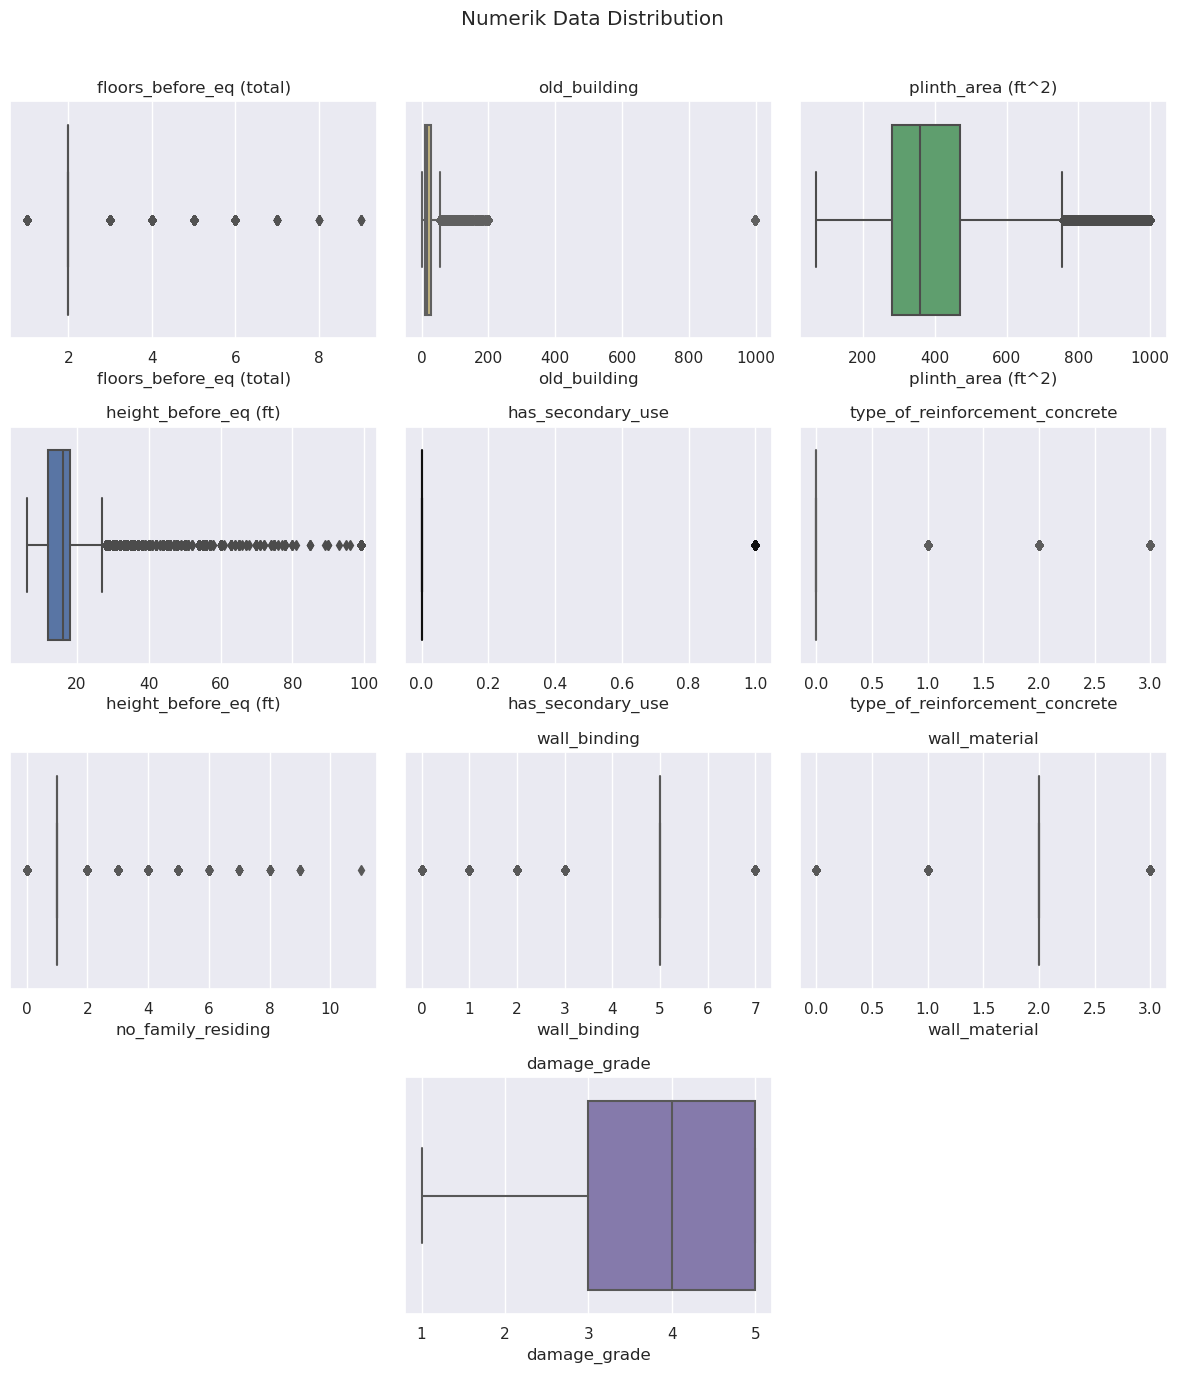

In [15]:
fig, axes = plt.subplots(4, 3, figsize=(12, 14))
fig.suptitle('Numerik Data Distribution\n\n')

sns.boxplot(train_clean, x=numerik_columns[1], ax=axes[0,0], color='r')
axes[0,0].set_title(numerik_columns[1])

sns.boxplot(train_clean, x=numerik_columns[2], ax=axes[0,1], color='y')
axes[0,1].set_title(numerik_columns[2])

sns.boxplot(train_clean, x=numerik_columns[3], ax=axes[0,2], color='g')
axes[0,2].set_title(numerik_columns[3])

sns.boxplot(train_clean, x=numerik_columns[4], ax=axes[1,0], color='b')
axes[1,0].set_title(numerik_columns[4])

sns.boxplot(train_clean, x=numerik_columns[5], ax=axes[1,1], color='k')
axes[1,1].set_title(numerik_columns[5])

sns.boxplot(train_clean, x=numerik_columns[6], ax=axes[1,2], color='c')
axes[1,2].set_title(numerik_columns[6])

sns.boxplot(train_clean, x=numerik_columns[7], ax=axes[2,0], color='m')
axes[2,1].set_title(numerik_columns[7])

sns.boxplot(train_clean, x=numerik_columns[8], ax=axes[2,1], color='m')
axes[2,1].set_title(numerik_columns[8])

sns.boxplot(train_clean, x=numerik_columns[9], ax=axes[2,2], color='m')
axes[2,2].set_title(numerik_columns[9])

sns.boxplot(train_clean, x=numerik_columns[10], ax=axes[3,1], color='m')
axes[3,1].set_title(numerik_columns[10])


fig.delaxes(axes[3,0])
fig.delaxes(axes[3,2])

plt.tight_layout()
plt.show()

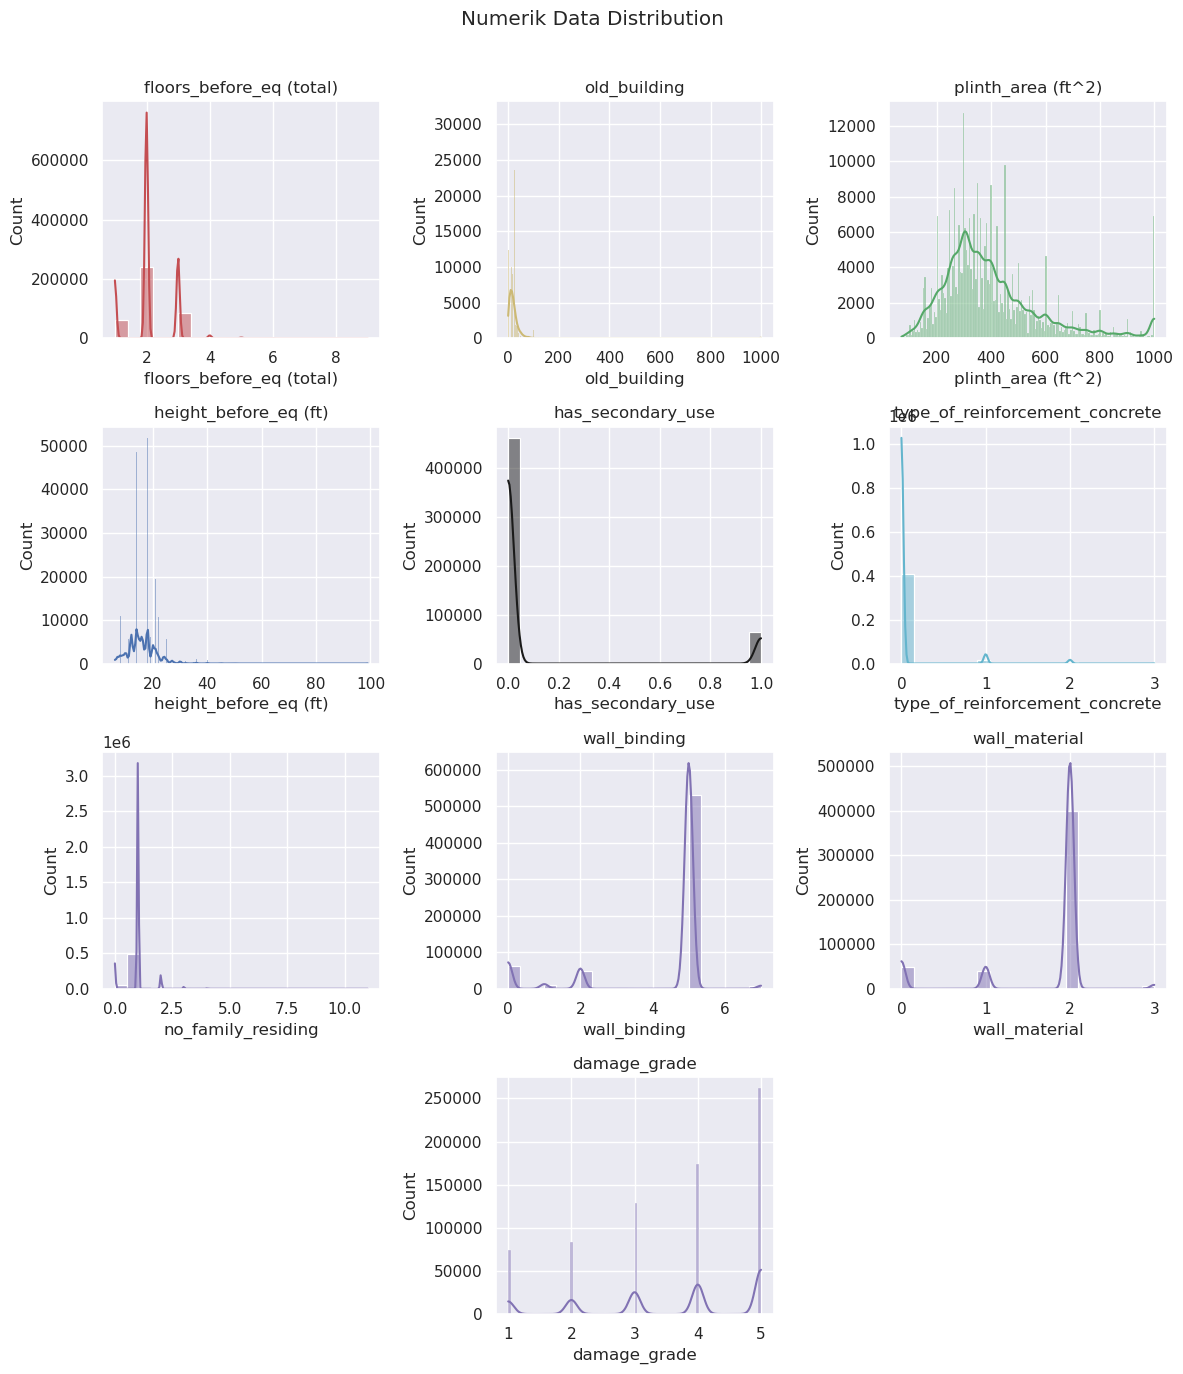

In [16]:
fig, axes = plt.subplots(4, 3, figsize=(12, 14))
fig.suptitle('Numerik Data Distribution\n\n')

sns.histplot(train_clean, x=numerik_columns[1], kde=True, ax=axes[0,0], color='r')
axes[0,0].set_title(numerik_columns[1])

sns.histplot(train_clean, x=numerik_columns[2], kde=True, ax=axes[0,1], color='y')
axes[0,1].set_title(numerik_columns[2])

sns.histplot(train_clean, x=numerik_columns[3], kde=True, ax=axes[0,2], color='g')
axes[0,2].set_title(numerik_columns[3])

sns.histplot(train_clean, x=numerik_columns[4], kde=True, ax=axes[1,0], color='b')
axes[1,0].set_title(numerik_columns[4])

sns.histplot(train_clean, x=numerik_columns[5], kde=True, ax=axes[1,1], color='k')
axes[1,1].set_title(numerik_columns[5])

sns.histplot(train_clean, x=numerik_columns[6], kde=True, ax=axes[1,2], color='c')
axes[1,2].set_title(numerik_columns[6])

sns.histplot(train_clean, x=numerik_columns[7], kde=True, ax=axes[2,0], color='m')
axes[2,1].set_title(numerik_columns[7])

sns.histplot(train_clean, x=numerik_columns[8], kde=True, ax=axes[2,1], color='m')
axes[2,1].set_title(numerik_columns[8])

sns.histplot(train_clean, x=numerik_columns[9], kde=True, ax=axes[2,2], color='m')
axes[2,2].set_title(numerik_columns[9])

sns.histplot(train_clean, x=numerik_columns[10], kde=True, ax=axes[3,1], color='m')
axes[3,1].set_title(numerik_columns[10])


fig.delaxes(axes[3,0])
fig.delaxes(axes[3,2])

plt.tight_layout()
plt.show()

In [17]:
train_clean[['type_of_reinforcement_concrete', 'wall_binding', 'wall_material', 'damage_grade']]

,type_of_reinforcement_concrete,wall_binding,wall_material,damage_grade
0,0.0,0.0,0.0,1.0
1,0.0,5.0,2.0,5.0
2,0.0,5.0,2.0,5.0
3,0.0,5.0,2.0,4.0
4,0.0,5.0,2.0,1.0
...,...,...,...,...
722810,0.0,1.0,0.0,4.0
722811,0.0,5.0,2.0,5.0
722812,0.0,5.0,1.0,5.0
722813,0.0,5.0,2.0,5.0


Text(0.5, 1.0, '\nKorelasi Data Numerik\n')

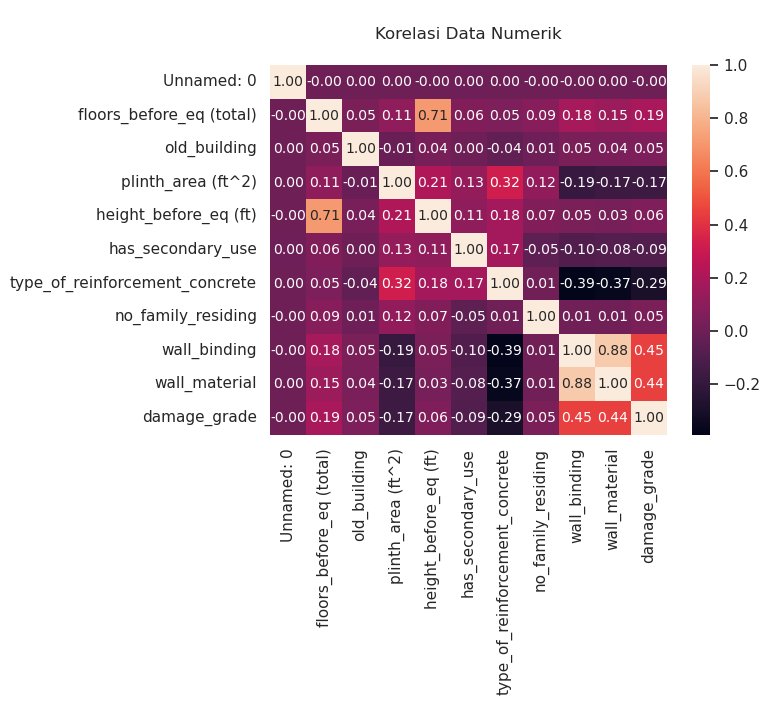

In [18]:
sns.heatmap(
    numerik.corr(),
    annot=True,
    fmt='.2f',
    annot_kws={'fontsize': 10}
)

plt.title('\nKorelasi Data Numerik\n')
# sns.set(font_scale=3)
# plt.subplots_adjust(top=0.92, bottom=0.08, left=0.12, right=0.95)


# Target Analysis

In [19]:
train_clean['damage_grade'].value_counts()

5.0    261631
4.0    174337
3.0    129242
2.0     83011
1.0     74594
Name: damage_grade, dtype: int64

<AxesSubplot:xlabel='damage_grade', ylabel='count'>

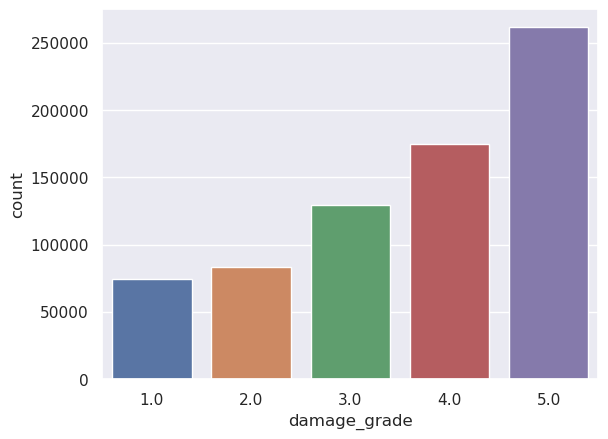

In [20]:
sns.countplot(train_clean, x='damage_grade')

# Modeling